In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("diabetic_data.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

<h1>Preprocessing</h1>

In [6]:
#Checking and replacing missing values
df.replace('?', float('nan'), inplace=True)

In [7]:
missing_counts = df.isna().sum()
missing_counts

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

As we see we have 2273 missing values for race feature
so we use mode to replace missing values.

In [8]:
mode_race = df['race'].mode()[0]
df['race'].fillna(mode_race, inplace=True)
print(df['race'].head(30))

0           Caucasian
1           Caucasian
2     AfricanAmerican
3           Caucasian
4           Caucasian
5           Caucasian
6           Caucasian
7           Caucasian
8           Caucasian
9           Caucasian
10    AfricanAmerican
11    AfricanAmerican
12          Caucasian
13          Caucasian
14    AfricanAmerican
15    AfricanAmerican
16    AfricanAmerican
17          Caucasian
18    AfricanAmerican
19          Caucasian
20          Caucasian
21          Caucasian
22    AfricanAmerican
23          Caucasian
24    AfricanAmerican
25              Other
26          Caucasian
27          Caucasian
28          Caucasian
29          Caucasian
Name: race, dtype: object


Now we drop weight, payer_code, medical_speciality, encounter_id and patient_nbr, citoglipton, examide.

In [9]:
df.drop(['weight'], axis=1, inplace=True)
df.drop(['medical_specialty'], axis=1, inplace=True)
df.drop(['payer_code'], axis=1, inplace=True)
df.drop(['encounter_id'], axis = 1, inplace = True)
df.drop(['patient_nbr'], axis = 1, inplace = True)
df = df.drop(['citoglipton'], axis = 1)
df = df.drop(['examide'], axis = 1)

In [10]:
diag_1_mode = df['diag_1'].mode()[0]
diag_2_mode = df['diag_2'].mode()[0]
diag_3_mode = df['diag_3'].mode()[0]

df['diag_1'] = df['diag_1'].fillna(diag_1_mode)
df['diag_2'] = df['diag_2'].fillna(diag_2_mode)
df['diag_3'] = df['diag_3'].fillna(diag_3_mode)

In [11]:
print(df['gender'][df['gender'] == 'Unknown/Invalid'].count()) 

3


we have 3 missing values in gender feature.
we drop them.

In [12]:
df = df[df['gender'] != 'Unknown/Invalid']

In [13]:
print(df['gender'][df['gender'] == 'Unknown/Invalid'].count()) 

0


Now we check the missing values.

In [14]:
missing_counts = df.isna().sum()
missing_counts

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [15]:
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

df['age'] = df['age'].apply(lambda x : replaceDict[x])
print(df['age'].head())

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


## Feature engineering & Exploratory data analysis (EDA)

In [16]:
# The diag_1 , diag_2 , diag_3 are categorical features but they have lots unique values
df['diag_1'] = df['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df['diag_2'] = df['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df['diag_3'] = df['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [17]:
# Replace '>30' / 'NO' with 0 and '<30' with 1 in Redmitted column
df['readmitted'] = df['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)

In [18]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

df = df[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [19]:
df['admission_type_id'] = df['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

In [20]:
df['admission_source_id'] = df['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

In [21]:
df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

In [22]:
df['A1Cresult'] = df['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))

In [23]:
for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    df[col] = df[col].apply(lambda x : 10 if x == 'Up' 
                                              else ( -10 if x == 'Down'                                                          
                                              else ( 0 if x == 'Steady'
                                              else  -20)))

In [24]:
df['change'] = df['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)

In [25]:
df['diabetesMed'] = df['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)

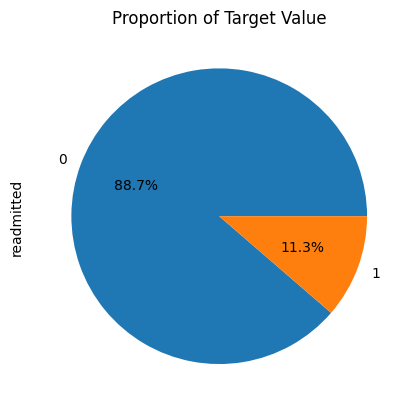

In [26]:
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

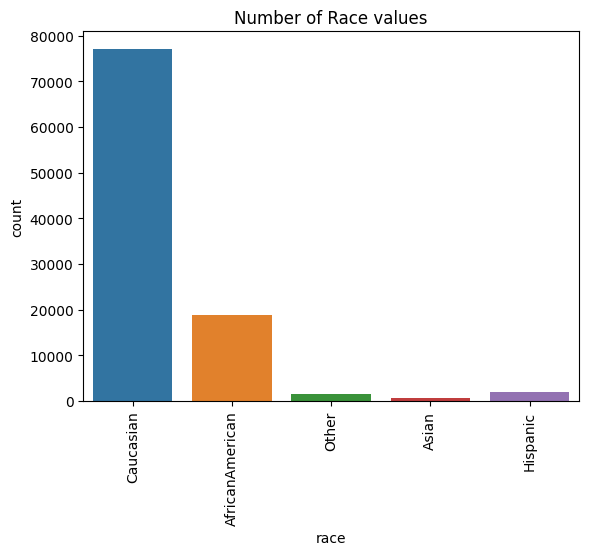

Proportion of Race
Caucasian          76.996534
AfricanAmerican    18.867058
Hispanic            2.021756
Other               1.483353
Asian               0.631299
Name: race, dtype: float64


In [27]:
sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

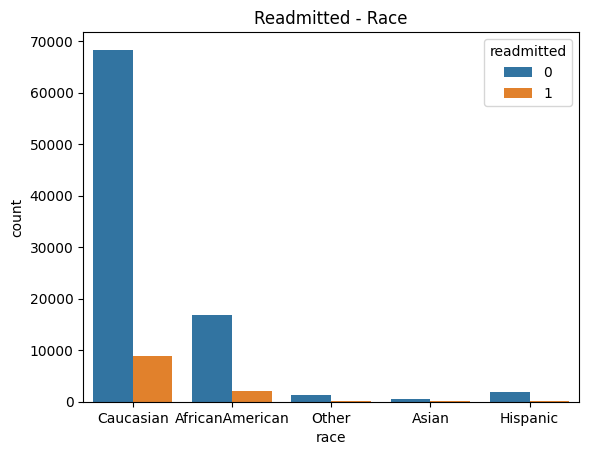

In [28]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

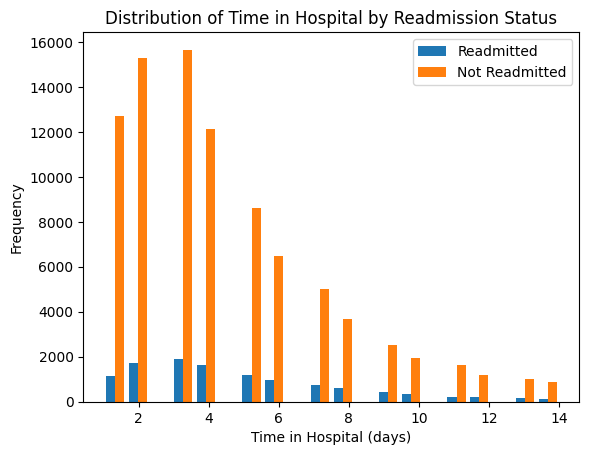

In [29]:
readmitted = df[df['readmitted'] == 1]['time_in_hospital']
not_readmitted = df[df['readmitted'] == 0]['time_in_hospital']

plt.hist([readmitted, not_readmitted], bins=20, label=['Readmitted', 'Not Readmitted'])
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Time in Hospital by Readmission Status')
plt.legend()
plt.show()

C:\Users\mokht\AppData\Local\Temp\ipykernel_16848\765795871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


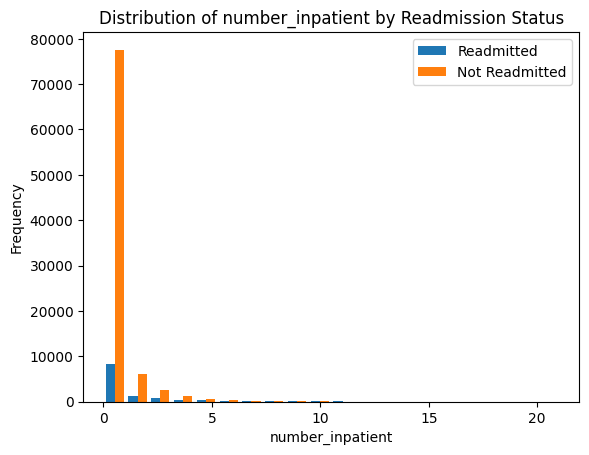

In [30]:
# Find the most correlated feature with the target feature
corr = df.corr()
target_corr = corr['readmitted'].drop('readmitted')
most_corr_feature = target_corr.abs().idxmax()

# Create a histogram plot of the most correlated feature with the target feature
readmitted = df[df['readmitted'] == 1][most_corr_feature]
not_readmitted = df[df['readmitted'] == 0][most_corr_feature]

plt.hist([readmitted, not_readmitted], bins=20, label=['Readmitted', 'Not Readmitted'])
plt.xlabel(most_corr_feature)
plt.ylabel('Frequency')
plt.title('Distribution of ' + most_corr_feature + ' by Readmission Status')
plt.legend()
plt.show()

### Neural network Classifier

In [37]:
# Split the dataset into training and testing sets
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the categorical features
cat_features = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3']
num_features = ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide','insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

encoder = LabelEncoder()

# Encode the categorical features in the training and testing data
for feature in cat_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.transform(X_test[feature])

# Build the neural network model
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=400, alpha=0.0001, solver='adam', verbose=10,  random_state=42, tol=0.0001)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Iteration 1, loss = 0.37239412
Iteration 2, loss = 0.35350793
Iteration 3, loss = 0.35031437
Iteration 4, loss = 0.35025282
Iteration 5, loss = 0.35133146
Iteration 6, loss = 0.34641739
Iteration 7, loss = 0.34516335
Iteration 8, loss = 0.34568986
Iteration 9, loss = 0.34786197
Iteration 10, loss = 0.34398108
Iteration 11, loss = 0.34394120
Iteration 12, loss = 0.34389223
Iteration 13, loss = 0.34259315
Iteration 14, loss = 0.34269036
Iteration 15, loss = 0.34313148
Iteration 16, loss = 0.34278520
Iteration 17, loss = 0.34218103
Iteration 18, loss = 0.34122812
Iteration 19, loss = 0.34108608
Iteration 20, loss = 0.34127689
Iteration 21, loss = 0.34072820
Iteration 22, loss = 0.34061022
Iteration 23, loss = 0.34079322
Iteration 24, loss = 0.34018059
Iteration 25, loss = 0.33993707
Iteration 26, loss = 0.33984108
Iteration 27, loss = 0.33972864
Iteration 28, loss = 0.33947662
Iteration 29, loss = 0.33944516
Iteration 30, loss = 0.33949216
Iteration 31, loss = 0.33893164
Iteration 32, los

In [38]:
# Report the performance of the neural network model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     17792
           1       0.21      0.03      0.06      2231

    accuracy                           0.88     20023
   macro avg       0.55      0.51      0.50     20023
weighted avg       0.82      0.88      0.84     20023



### K-means

In [39]:
for feature in cat_features:
    df[feature] = encoder.fit_transform(df[feature])

features = cat_features + num_features
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster the data using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_
df['cluster'] = labels
print(df['cluster'].value_counts())

c:\Users\mokht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    52265
0    47846
Name: cluster, dtype: int64
